<a href="https://colab.research.google.com/github/manuelapop/neural-network-simple-example/blob/main/neural-network-simple-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [398]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [399]:
# Create a Model Class that inherits nn.Module, 2 neuron layers
class Model(nn.Module):
  # Input layer (4 features of the flower) -->	sepal.length, sepal.width, petal.length, petal.width
  # Hidden Layer1 (number of neurons) --> 8 neurons
  # H2 (n) --> 9 neurons
  # output (3 classes of iris flowers) Setosa, Versicolor, Virginica
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1) #fc - fully connected, first layer you add in features and push it to hidden layer 1
    self.fc2 = nn.Linear(h1, h2) #hidden layer one push to hidden layer 2
    self.out = nn.Linear(h2, out_features) #out hidden layer 2 to output

  def forward(self, x): #forwarding function
    x = F.relu(self.fc1(x)) #relu pushing fc1
    x = F.relu(self.fc2(x)) #relu pushing fc2
    x = self.out(x) #relu pushing output

    return x


In [400]:
# Pick a manual seed for randomization
torch.manual_seed(61)
# Create an instance of model
model = Model()

In [401]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [402]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [403]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [404]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

<ipython-input-404-4c3175dde3a4>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [405]:
# Train Test Split!  Set X, y
X = my_df.drop('variety', axis=1) #x features only
y = my_df['variety'] #y output classification

In [406]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [407]:
from sklearn.model_selection import train_test_split

In [408]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)

In [409]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [410]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [411]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [412]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 200
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1167956590652466
Epoch: 10 and loss: 0.915581464767456
Epoch: 20 and loss: 0.6557968854904175
Epoch: 30 and loss: 0.46249207854270935
Epoch: 40 and loss: 0.3715495467185974
Epoch: 50 and loss: 0.28551074862480164
Epoch: 60 and loss: 0.2014545500278473
Epoch: 70 and loss: 0.13901546597480774
Epoch: 80 and loss: 0.10346101224422455
Epoch: 90 and loss: 0.084723100066185
Epoch: 100 and loss: 0.07451989501714706
Epoch: 110 and loss: 0.06866029649972916
Epoch: 120 and loss: 0.06495726853609085
Epoch: 130 and loss: 0.06239789351820946
Epoch: 140 and loss: 0.06048845872282982
Epoch: 150 and loss: 0.05897931382060051
Epoch: 160 and loss: 0.05773212015628815
Epoch: 170 and loss: 0.05666251853108406
Epoch: 180 and loss: 0.055722471326589584
Epoch: 190 and loss: 0.05488079413771629


Text(0.5, 0, 'Epoch')

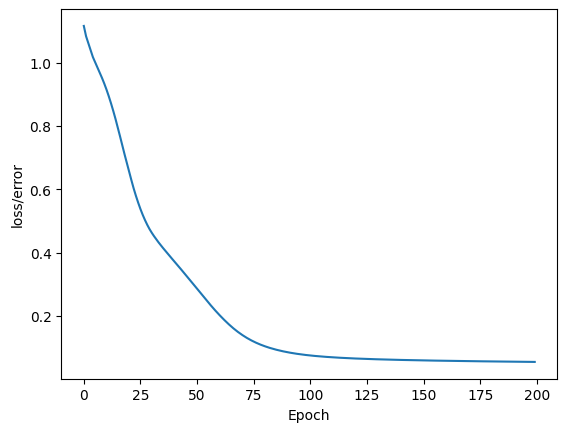

In [413]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [414]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [415]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-0.0901,  9.8387,  2.0291]) 	 1 	 1
2.)  tensor([0.3802, 9.3584, 1.3465]) 	 1 	 1
3.)  tensor([-4.7349,  9.5222,  8.6551]) 	 1 	 1
4.)  tensor([0.2332, 9.9612, 1.6769]) 	 1 	 1
5.)  tensor([ 13.8877,   6.3667, -15.3940]) 	 0 	 0
6.)  tensor([-11.0362,  10.9912,  18.4152]) 	 2 	 2
7.)  tensor([ 13.1610,   6.0558, -14.6164]) 	 0 	 0
8.)  tensor([-5.8044,  9.8992, 10.3506]) 	 2 	 2
9.)  tensor([0.4691, 9.0719, 1.1526]) 	 1 	 1
10.)  tensor([ 12.6043,   5.8208, -14.0202]) 	 0 	 0
11.)  tensor([-7.5504,  8.5298, 12.6307]) 	 2 	 2
12.)  tensor([ 13.2107,   6.4953, -14.5660]) 	 0 	 0
13.)  tensor([-9.1210,  9.4072, 15.1837]) 	 2 	 2
14.)  tensor([-0.6682, 10.3253,  2.8436]) 	 1 	 1
15.)  tensor([ 13.5180,   6.2085, -14.9984]) 	 0 	 0
16.)  tensor([-1.3287,  9.2811,  3.5215]) 	 1 	 1
17.)  tensor([ 13.5499,   6.2222, -15.0326]) 	 0 	 0
18.)  tensor([ 13.5579,   6.2256, -15.0411]) 	 0 	 0
19.)  tensor([-8.1326, 10.3899, 13.9402]) 	 2 	 2
20.)  tensor([ 12.2427,   6.3529, -13.4673])

In [416]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [417]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 12.6387,   5.8349, -14.0570])


In [418]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [419]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-7.4460,  9.8274, 12.7846])


In [420]:
# Save our NN Model
torch.save(model.state_dict(), 'my_model.pt')

In [421]:
new_model = Model()
new_model.load_state_dict(torch.load('my_model.pt'))

<All keys matched successfully>

In [422]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)